# Sales

By: Siny Pullukkara Raphel

In [1]:
import pandas as pd
import numpy as np

In [2]:
sales = pd.read_csv('sales-data.csv', parse_dates=['Order Date'])

In [43]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 12.8+ MB


In [44]:
sales.head(1)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)


In [3]:
sales['Sales'] = sales['Quantity Ordered'] * sales['Price Each']
sales['Order Hour'] = sales['Order Date'].dt.hour
sales.drop('Unnamed: 0', inplace=True, axis=1)
sales.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14


In [22]:
sales.Product.nunique()

19

1. 	What was the best month for sales? How much was earned that month?


In [4]:
sales_month = sales.groupby('Month')['Sales'].sum()

In [16]:
print(f"Best month of sales was {sales_month.idxmax()} and sales that month is ${sales_month.max()}")

Best month of sales was 12 and sales that month is $4613443.34


2. What city sold the most product?

In [24]:
sales.groupby('City')['Quantity Ordered'].sum().idxmax()

'San Francisco  (CA)'

3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

<AxesSubplot:xlabel='Order Hour'>

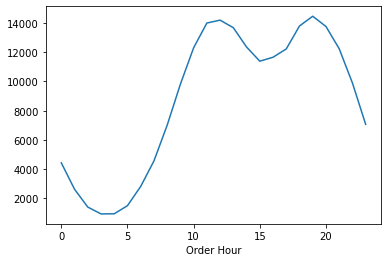

In [53]:
# We are grouping with respect to hour of order and calculating the sum of quatities purchased
sales.groupby('Order Hour')['Quantity Ordered'].sum().plot()

In [51]:
sales.groupby('Order Hour')['Quantity Ordered'].sum().idxmax()

19

Items purchased between 7-8pm is highest. So advertising during that time might increase sales.

If we analyse the graph sales are high from 10am to 8pm. We can also see that there is a peak on 11am and 7pm

4. What products are most often sold together?

In [31]:
#Let us see if we have unique orderid
mul_orders = sales.groupby('Order ID')['Order ID'].count() > 1

In [ ]:
7136 orderids have more than one entries in the data

In [32]:
# get the orderids with multiple items
mul_order_ids = mul_orders[mul_orders == True].index

In [33]:
mul_order_ids.unique()

Int64Index([141275, 141290, 141365, 141384, 141450, 141457, 141478, 141550,
            141587, 141645,
            ...
            319337, 319359, 319447, 319514, 319533, 319536, 319556, 319584,
            319596, 319631],
           dtype='int64', name='Order ID', length=7136)

In [34]:
# create a dataframe with orderids and corresponding items of that order joined as string
item_lst = pd.DataFrame(columns=['Id', 'Item_List'])
for i in range(mul_order_ids.shape[0]):
    item_lst.loc[i, 'Id'] = mul_order_ids[i]
    item_lst.loc[i, 'Item_List'] = ', '.join(sales[sales['Order ID'] == mul_order_ids[i]]['Product'])
#     print( (sales[sales['Order ID'] == mul_order_ids[i]]['Product']).to_list())

In [106]:
# groupby "item list string" and get the count of occurences
item_lst.groupby('Item_List')['Item_List'].count().sort_values(ascending=False)

Item_List
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
                                                       ... 
LG Dryer, 27in FHD Monitor                                1
LG Dryer, 27in 4K Gaming Monitor                          1
Google Phone, Wired Headphones, USB-C Charging Cable      1
Google Phone, Wired Headphones, Macbook Pro Laptop        1
iPhone, iPhone                                            1
Name: Item_List, Length: 366, dtype: int64

In [7]:
item_lst.groupby('Item_List')['Item_List'].count().sort_values(ascending=False).idxmax()

'iPhone, Lightning Charging Cable'

The combination of iphone and lightening charging cable are sold most

Alternate

In [30]:
# Alternate
sales[sales['Order ID'].duplicated()]['Order ID']


3         176560
18        176574
30        176585
32        176586
119       176672
           ...  
185885    259297
185886    259297
185893    259303
185905    259314
185942    259350
Name: Order ID, Length: 7513, dtype: int64

5. What product sold the most? Why do you think it sold the most

In [28]:
sales.groupby('Product')['Quantity Ordered'].sum().idxmax()

'AAA Batteries (4-pack)'

Batteries are sold most. Since it is essential to run appliances that we use in our day to day life. We do not buy big electronics like desktop or tv or phones everyday.